# Introduction to Importing Data, Using Tables and Creating Graphs 

## The Jupyter Notebook

First of all, note that this page is divided into what are called "cells". For example, the following cell is a "code cell" where you will write your code. You'll see a `In [ ]:` next to each cell for code, which is a counter for the cells you have run. You can navigate cells by clicking on them or by using the up and down arrows. Cells will be highlighted as you navigate them.

In [4]:
# this is a code cell

### Executing cells

<p></p>

<div class="alert alert-info">
You can execute cells with <b><code>Ctrl-Enter</code></b> (which will run the cell and keep the same cell selected), or <b><code>Shift-Enter</code></b> (which will run the cell and then select the next cell).
</div>

Try running the following cell and see what it prints out:

In [5]:
print("Hello world!")

Hello world!


Now run this cell to `import` some code we'll use today, nothing will `print` out, don't worry!

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from datascience import *
%matplotlib inline 
plt.style.use("fivethirtyeight")

## Creating Tables

### From Scratch

If we don't have a spreadsheet file and are starting with nothing, first we need to make arrays. Arrays are simply a form of list that a programming language uses to denote a collection of items. In the case of a table, we'll consider an array as either a row or a column. Let's make two arrays below that will become our columns, one for famous psychologists and one for the year they were born. 

In general, to make an array we use: 

```python
make_array(attribute_1, attribute_2, ...)
```

We set each of these created arrays equal to a variable name. This means that from now on, we can use that variable name to reference its respective array! Variables make information storage and retrieval much easier. 

In [7]:
psychologist_names = make_array("Freud", "Skinner", "Piaget", "Maslow")
psychologist_birth = make_array(1856, 1904, 1896, 1908)

Since we've assigned these to variables, all we have to do is call the variable name to get the information back, or to manipulate it!

In [8]:
psychologist_names

array(['Freud', 'Skinner', 'Piaget', 'Maslow'],
      dtype='<U7')

Now, to make a table using these arrays, we use the general form:

```python
Table( ).with_columns("Column Name", array_name, . . .)
```

We assign the created table to a variable (just like the arrays from above), and then type that variable name to display the table. 

In [9]:
psych_table= Table().with_columns("Psychologist", psychologist_names,
                                  "Birth Year", psychologist_birth)
psych_table 

Psychologist,Birth Year
Freud,1856
Skinner,1904
Piaget,1896
Maslow,1908


### Importing

It's more likey that a file holding your data already exists. In general, to import data from a file, we write:

```python
Table.read_table("file_name")
```

Most often, these file names end in `.csv` to show the data format. `.csv` format is popular for spreadsheets and can be imported/exported from programs such as Microsoft Excel, OpenOffice Calc, or Google spreadsheets. 
 
An example is shown below using [U.S. Census data](http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv). 

In [10]:
Table.read_table("http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv")

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035
0,5,4056858,4056872,4064653,4087709,4132242,4123626,4006900,4018158
0,6,4066381,4066412,4073013,4074993,4097605,4142916,4135930,4019207
0,7,4030579,4030594,4043046,4083225,4084913,4108349,4155326,4148360
0,8,4046486,4046497,4025604,4053203,4093177,4095711,4120903,4167887
0,9,4148353,4148369,4125415,4035710,4063152,4104072,4108349,4133564


That's a lot of information. As you can see from the labels on top, this table shows Biological Sex (0=total, 1=male, 2=female), Age,  2010 Census Information, and predictions for U.S. population for the next five years. 

## Using Tables

We can make criteria to cut down tables. Accessing only the rows, columns, or values specfic to our purpose makes information easier understood. Analysis and conclusions can be made when data is more digestible. 

We need to access the census table above and name it for further use. We assign the table to a variable, similar to what we did above!

In [11]:
census_data = Table.read_table("http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv")
census_data

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035
0,5,4056858,4056872,4064653,4087709,4132242,4123626,4006900,4018158
0,6,4066381,4066412,4073013,4074993,4097605,4142916,4135930,4019207
0,7,4030579,4030594,4043046,4083225,4084913,4108349,4155326,4148360
0,8,4046486,4046497,4025604,4053203,4093177,4095711,4120903,4167887
0,9,4148353,4148369,4125415,4035710,4063152,4104072,4108349,4133564


This notebook can calculate how large this table is with two functions: num_rows and num_columns. The general form for these functions are table.num_rows and table.num_columns. 

Let's use these on the table above. 

In [12]:
census_data.num_rows

306

In [13]:
census_data.num_columns

10

That's a 306 x 10 table! We can first start to cut down this table using only some columns. Let's only include biological sex, age and the estimated base for 2010 census data. 

There are two methods to make a table with select columns included. We could either use the 'select' function or the 'drop' function. 

- `select` can create a new table with only the columns indicated in the parameters 
- `drop` can create a new table with columns NOT indicated in the parameters


Here's an example of two equal codes: (keep in mind that we assign each new table to a new variable, to make organization easier). 

In [14]:
select_census_data = census_data.select("SEX", "AGE", "ESTIMATESBASE2010")
select_census_data

SEX,AGE,ESTIMATESBASE2010
0,0,3944160
0,1,3978090
0,2,4096939
0,3,4119051
0,4,4063186
0,5,4056872
0,6,4066412
0,7,4030594
0,8,4046497
0,9,4148369


In [15]:
drop_census_data = census_data.drop("CENSUS2010POP","POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013","POPESTIMATE2014","POPESTIMATE2015")
drop_census_data

SEX,AGE,ESTIMATESBASE2010
0,0,3944160
0,1,3978090
0,2,4096939
0,3,4119051
0,4,4063186
0,5,4056872
0,6,4066412
0,7,4030594
0,8,4046497
0,9,4148369


As you can see underneath the table, there are still 296 rows omitted! Our next step is to only include non-gendered data AKA data where SEX=0, neither male or female specific. 

To do this, we need to use a new function `where`. The general form of this function is:

```python
table_name.where(column_name, predicate)
```

To cut our table down to only include `sex=0`, we may use the predicate `are.equal_to()`. Note that we are assigning the new table to a new variable. We are referencing the table stored in an older variable (`select_census_data`), and modifying it. That modification is what is stored in the new variable. 

In [16]:
new_census_data = select_census_data.where("SEX", are.equal_to(0))
new_census_data

SEX,AGE,ESTIMATESBASE2010
0,0,3944160
0,1,3978090
0,2,4096939
0,3,4119051
0,4,4063186
0,5,4056872
0,6,4066412
0,7,4030594
0,8,4046497
0,9,4148369


There are still 92 rows omitted! Let's take every 10th entry to cut this table down a little more. 

To do this we need to use the `take` function. The `take` function creates a new table with rows from the original table whose indices(row number) are given. In Python, indices start at 0! 

Here's taking every 10th entry. Inside of the take parentheses is a Python list of numbers from 0 to 90, increasing by 10s. This indicates exactly which rows we want to keep (every 10th row).

In [17]:
census_10_year = new_census_data.take([0,10,20,30,40,50,60,70,80,90])
census_10_year

SEX,AGE,ESTIMATESBASE2010
0,0,3944160
0,10,4172559
0,20,4519556
0,30,4285877
0,40,4383450
0,50,4660457
0,60,3621214
0,70,2043178
0,80,1308608
0,90,435695


Now that sex is all the same, we can drop that column. 

In [18]:
final_census_table = census_10_year.drop("SEX")
final_census_table

AGE,ESTIMATESBASE2010
0,3944160
10,4172559
20,4519556
30,4285877
40,4383450
50,4660457
60,3621214
70,2043178
80,1308608
90,435695


---

### Tables Essentials!

For your reference, here's a table of useful `Table` functions:

|Name|Example|Purpose|
|-|-|-|
|`Table`|`Table()`|Create an empty table, usually to extend with data|
|`Table.read_table`|`Table.read_table("my_data.csv")`|Create a table from a data file|
|`with_columns`|`tbl = Table().with_columns("N", np.arange(5), "2*N", np.arange(0, 10, 2))`|Create a copy of a table with more columns|
|`column`|`tbl.column("N")`|Create an array containing the elements of a column|
|`sort`|`tbl.sort("N")`|Create a copy of a table sorted by the values in a column|
|`where`|`tbl.where("N", are.above(2))`|Create a copy of a table with only the rows that match some *predicate*|
|`num_rows`|`tbl.num_rows`|Compute the number of rows in a table|
|`num_columns`|`tbl.num_columns`|Compute the number of columns in a table|
|`select`|`tbl.select("N")`|Create a copy of a table with only some of the columns|
|`drop`|`tbl.drop("2*N")`|Create a copy of a table without some of the columns|
|`take`|`tbl.take(np.arange(0, 6, 2))`|Create a copy of the table with only the rows whose indices are in the given array|
|`join`|`tbl1.join("shared_column_name", tbl2)`|Join together two tables with a common column name
|`are.equal_to()`|`tbl.where("SEX", are.equal_to(0))`|find values equal to that indicated|
|`are.not_equal_to()`|`tbl.where("SEX", are.not_equal_to(0))` | find values not including the one indicated|
|`are.above()`| `tbl.where("AGE", are.above(30))` | find values greater to that indicated|
|`are.below()`| `tbl.where("AGE", are.below(40))` | find values less than that indicated |
|`are.between()`| `tbl.where("SEX", are.between(18, 60))` | find values between the two indicated |

---

## Visualizations 

Now that we have a manageable table we can start making visualizations! Due to the numerical nature of the census table above, let's first try a scatter plot. 

To create a scatter plot, we need to use the `scatter()` function. The general form is:

```python
table.scatter("column for x axis", "column for y axis")
```

An example is shown below:

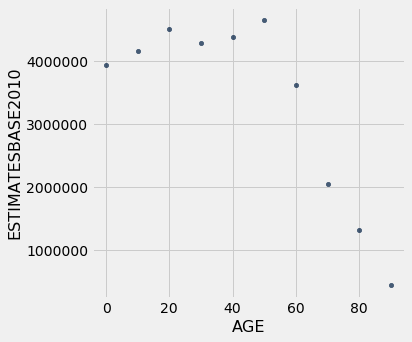

In [19]:
final_census_table.scatter("AGE", "ESTIMATESBASE2010") 

With this data, we can also make a line plot. To do this, we need to use the `plot()` function. This works a lot like `scatter()` where the general form is:

```python
table.plot("x column", "y column")
```

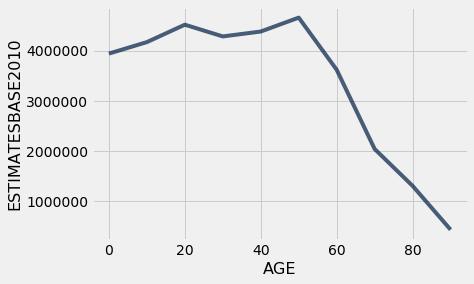

In [20]:
final_census_table.plot("AGE", "ESTIMATESBASE2010") 

Though a bar may be better. Bar graphs follow the same formula as scatter plots and line graphs above, with the general form:

```python
table.bar("x axis", "y axis")
```

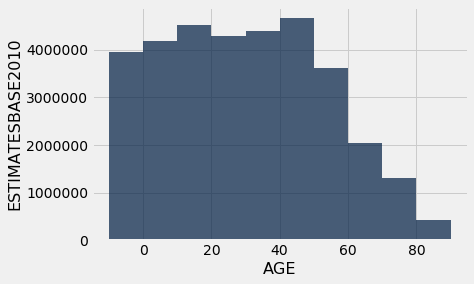

In [21]:
final_census_table.bar("AGE", "ESTIMATESBASE2010") 

---

Let's go back to our psychologist table. Below is our psychologist birth year table with an added column for popularity. The third column is how many students voted for that psychologist as their favorite. 

In [22]:
student_vote = make_array(12, 15, 3, 29)
new_psych = psych_table.with_columns("Student Vote", student_vote)
new_psych

Psychologist,Birth Year,Student Vote
Freud,1856,12
Skinner,1904,15
Piaget,1896,3
Maslow,1908,29


From this table, we can create a bar graph comparing psychologists and how many students voted for them. You can see an example below. 

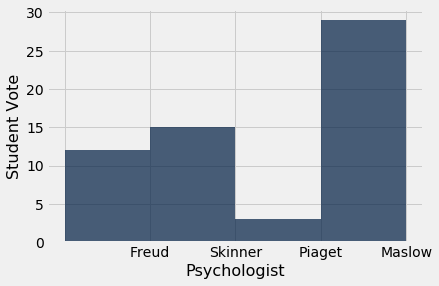

In [23]:
new_psych.bar("Psychologist", "Student Vote")

For a better visualization, you can flip the bar graph horizontally by using the function `barh()` as shown below: 

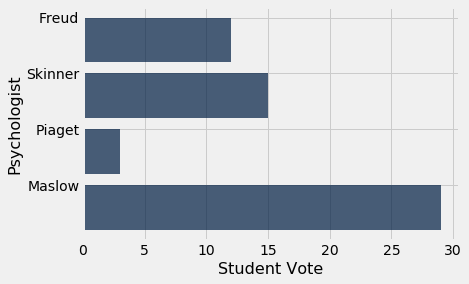

In [24]:
new_psych.barh("Psychologist", "Student Vote")

One last visualization technique we may use is the histogram. A histogram is a type of visualization where data is grouped into ranges; those ranges are then plotted as bars. This one is a little trickier than the ones above. The function we will use is:

```python
table.hist("x axis", bins("optional"), unit("optional"))
```

Bins are contiguous intervals (that span over each of the data groupings) so a dataset may be grouped together. Bin parameters are inclusive on the left end and exclusive on the right on or math wise: `[a, b)`. 

Adjustments can be made on bins to include high or low outliers. We will see this using the census data we have above. 

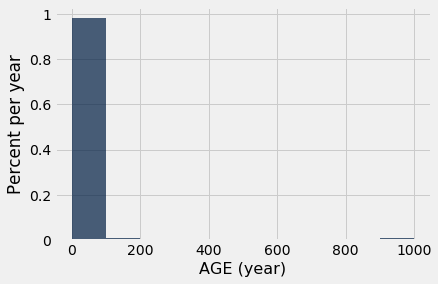

In [25]:
census_data.hist("AGE", unit= "year")

As you can see, binning to include outliers would allow use a better visual of percent population per age. `bins` and `same_bins` below both get you the same histogram shown. 

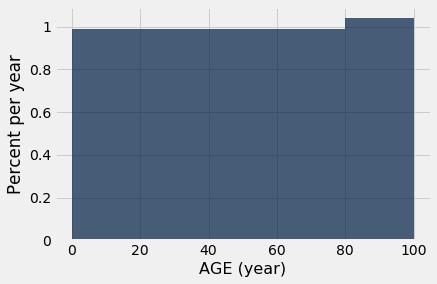

In [26]:
bins = make_array(0,20,40,60,80,100)
same_bins = np.arange(0,120,20)
census_data.hist("AGE", bins=same_bins, unit="year")

As you can tell by this histogram, the number of Americans surveyed by the census per age stays consistently the same except for those over 100. The number of newborns in America is approximately the same as 45 year olds. This helps when analyzing the data so that we have an even sample across ages.

## Merging Tables

We are going to cover one more topic briefly that you may need to use in your project. We are going to look into how to merge two tables that have common information. This technique will be very valuable when the time comes for you to do your own analysis with your own data sets. 

Let's first look at the new_psych table from a few cells ago.

In [27]:
new_psych

Psychologist,Birth Year,Student Vote
Freud,1856,12
Skinner,1904,15
Piaget,1896,3
Maslow,1908,29


### Adding rows

Using some of the techniques from earlier in the notebook, we will now create a "dummy table" that has the same columns as the new_psych table.

In [28]:
psych_names= make_array("Jung", "Erikson")
psych_birth= make_array(1875, 190)
psych_sv = make_array(9,28)

new_psych_2= Table().with_columns("Psychologist", psych_names,
                                  "Birth Year", psych_birth,
                                   "Student Vote", psych_sv)
new_psych_2

Psychologist,Birth Year,Student Vote
Jung,1875,9
Erikson,190,28


Great! We see that this second table has the same columns as the first one. Merging these two tables would allow us to consolidate our information. We are going to use the "append" method to append the second table onto the first!

In [29]:
new_psych_merged = Table.copy(new_psych)  # copying over the new_psych table to a new variable for the merged table
new_psych_merged.append(new_psych_2)
new_psych_merged

Psychologist,Birth Year,Student Vote
Freud,1856,12
Skinner,1904,15
Piaget,1896,3
Maslow,1908,29
Jung,1875,9
Erikson,190,28


As you can see, we have succesfully merged these two tables together! Now, let us try merging an additional column onto the original `new_psych` table. 

### Adding columns

Let's pretend that we suddenly have access to the favorite foods of each psychologist. Wow! We definitely want to include that information in our table. This means that we need to merge in a new column to the initial table. Let us print the original table first, and then make a seperate column with the favorite foods.

In [30]:
new_psych

Psychologist,Birth Year,Student Vote
Freud,1856,12
Skinner,1904,15
Piaget,1896,3
Maslow,1908,29


Now we are going to create our "dummy" column.

In [31]:
psych_foods = make_array("Pizza", "Snickers", "Grapes", "Escargot")
food_column = Table().with_columns("Favorite Food", psych_foods)
food_column

Favorite Food
Pizza
Snickers
Grapes
Escargot


We are going to use a similar process as before to merge this column! The method we now use is `append_column`. Otherwise, the format stays the same!

In [32]:
new_psych_merged_with_food = Table.copy(new_psych)  # copying over the new_psych table to a new variable 
new_psych_merged_with_food.append_column("Favorite Food", psych_foods)
new_psych_merged_with_food

Psychologist,Birth Year,Student Vote,Favorite Food
Freud,1856,12,Pizza
Skinner,1904,15,Snickers
Piaget,1896,3,Grapes
Maslow,1908,29,Escargot


As you can see, we've successfully merged a column to our table too!

### Joining on columns

Suppose now that you have more information on the these psycologists, but the rows aren't in the right order, but you have their names and birth place.

In [33]:
places = make_array("New York", "Pennsylvania", "Switzerland", "Czech Republic")
new_psych_info = Table().with_columns("Psychologist", ["Maslow", "Skinner", "Piaget", "Freud"],
                                      "Birth Place", places)
new_psych_info

Psychologist,Birth Place
Maslow,New York
Skinner,Pennsylvania
Piaget,Switzerland
Freud,Czech Republic


Awesome! We love more data, but how can I merge this back into our existing information? We can't just add a column because the order is different.

***Solution***: We can use the `join` method and tell it which column the two tables have in common:

In [34]:
new_psych_merged_with_food.join("Psychologist", new_psych_info)

Psychologist,Birth Year,Student Vote,Favorite Food,Birth Place
Freud,1856,12,Pizza,Czech Republic
Maslow,1908,29,Escargot,New York
Piaget,1896,3,Grapes,Switzerland
Skinner,1904,15,Snickers,Pennsylvania


Phew!

---

## SUMMARY 

### You've learned a lot in this module! Let's look back on the key parts. 

- To import data from a .csv/.txt file, we write `Table.read_table("file_name")`.

- To create our own table, we write `Table( ).with_columns("Column Name", array_name, . . .)` . 

- To count number of rows, we use `table_name.num_rows`.

- To count number of columns, we use `table_name.num_columns`.

- To create a new table with only the columns indicated in the parameters, we use `table_name.select("COLUMN NAME", ...)`. 

- To create a new table without the columns indicated in the parameters, we use `table_name.drop("COLUMN NAME", ...)`. 

- To create a table with only certain values, we can use `table_name.where(column_name, predicate)`.

- To create a new table with indicated rows from the original table, we use `table_name.take([index 1, index 2, . . . ])`. Remember in Python indices start at 0!

- To create a scatter plot, we use `table.scatter(column for x axis, column for y axis)`.

- To create a line plot, we use `table.plot(x column, y column)`.

- To make a bar graphs, we can use either `table.bar(x column, y column)` or `table.barh(x column, y column)`. 

- To make a histogram, we use `table.hist(x axis, bins(optional), unit(optional))`. 

- To merge tables, we use either `append` or `append_column`.

- To merge two tables with a common column name we use the `join` method.

---

With just some simple code, we were able to do an incredible amount of data analysis! Play around with the examples until you feel comfortable with the content of this notebook. We will be using notebooks to analyze your own data sets in the future! Please ask if you have questions!